In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime


from plotly import __version__
import cufflinks as cf

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
%matplotlib inline

# Loading in data

In [3]:
# Import hourly pickups by Chicago Side
df_sides = pd.read_csv("hour_pickups_sides_final.csv")

df_sides["StartTime"] = pd.to_datetime(df_sides["StartTime"], 
                                       format="%d/%m/%Y %H:%M")

# set index
df_sides.set_index("StartTime", inplace=True)

df_sides.describe().astype(int)

,FNS,Ohara,NWS,NS,WS,CEN,SS,SWS,FSWS,FSES,is_holiday,is_weekend,season
count,10224,10224,10224,10224,10224,10224,10224,10224,10224,10224,10224,10224,10224
mean,88,40,32,199,218,308,68,49,22,15,0,0,1
std,46,30,16,135,126,196,36,23,11,8,0,0,1
min,0,0,0,0,0,0,0,0,0,0,0,0,0
25%,53,16,20,101,114,138,37,31,14,9,0,0,1
50%,87,36,32,169,219,305,70,51,23,15,0,0,2
75%,117,61,43,262,298,441,96,67,31,21,0,1,2
max,306,168,121,901,738,1079,210,141,80,53,1,1,3


In [4]:
# concert dataframe to floats
df_sides.astype(float)

,FNS,Ohara,NWS,NS,WS,CEN,SS,SWS,FSWS,FSES,is_holiday,is_weekend,season
StartTime,,,,,,,,,,,,,
2018-11-01 00:00:00,70.0,15.0,20.0,174.0,134.0,141.0,48.0,25.0,17.0,12.0,0.0,0.0,2.0
2018-11-01 01:00:00,46.0,5.0,9.0,200.0,94.0,103.0,22.0,16.0,17.0,7.0,0.0,0.0,2.0
2018-11-01 02:00:00,38.0,1.0,11.0,122.0,67.0,74.0,13.0,16.0,13.0,8.0,0.0,0.0,2.0
2018-11-01 03:00:00,19.0,1.0,15.0,73.0,51.0,63.0,9.0,13.0,15.0,8.0,0.0,0.0,2.0
2018-11-01 04:00:00,27.0,0.0,12.0,50.0,50.0,49.0,18.0,22.0,13.0,6.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,253.0,30.0,79.0,600.0,491.0,637.0,109.0,69.0,32.0,31.0,1.0,0.0,3.0
2019-12-31 20:00:00,279.0,20.0,82.0,695.0,540.0,647.0,110.0,106.0,47.0,42.0,1.0,0.0,3.0
2019-12-31 21:00:00,255.0,23.0,121.0,610.0,513.0,669.0,115.0,75.0,40.0,28.0,1.0,0.0,3.0


# Visualization of hourly pickups across sides

In [5]:
def visualize(data, colnumber, start_val, end_val):
    plt.figure(figsize=(10,5))
    plt.plot(data.iloc[start_val:end_val, 3])

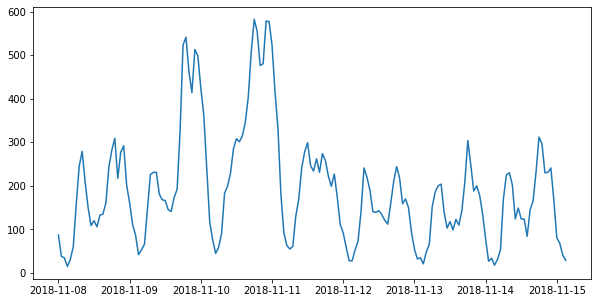

In [6]:
visualize(df_sides, colnumber=1, start_val=168, end_val=340)

# Time series check need for differencing

In [7]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error


In [8]:
def get_stationarity(timeseries):
    # rolling statistics
    rolling_mean = timeseries.rolling(window=24).mean()
    rolling_std = timeseries.rolling(window=24).std()
    
    # rolling statistics plot
    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(timeseries.index, timeseries, color="blue", label="Original")
    ax.plot(rolling_mean, color="red", label="Rolling Mean")
    ax.plot(rolling_std, color="black", label="Rolling Std")
    ax.legend(loc="best")
    ax.set_title("Rolling Mean & Standard Deviation")
    
    # Dickey-Fuller test:
    result = adfuller(timeseries)
    print("ADF Statistics: {}".format(result[0]))
    print("p-value: {}".format(result[1]))
    print("Critical Values:")
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

ADF Statistics: -13.509780547549296
p-value: 2.8682906384087954e-25
Critical Values:
	1%: -3.4309922139298674
	5%: -2.8618238209224707
	10%: -2.566921072734192


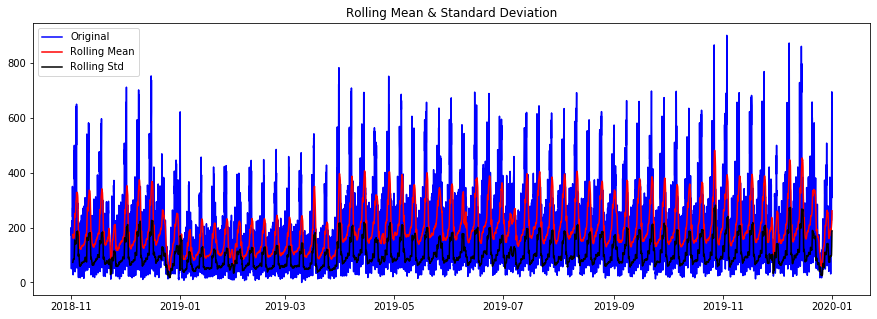

In [9]:
get_stationarity(df_sides.iloc[:, 3]) # ohara

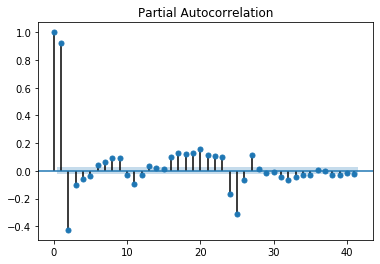

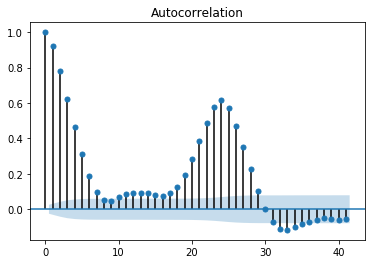

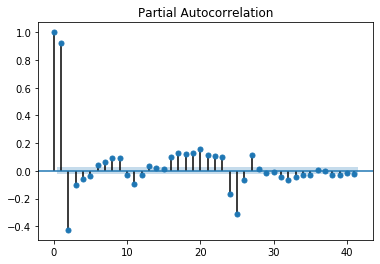

In [10]:
# get ACF and PACF plot
plot_acf(df_sides.iloc[:, 3], alpha=0.01)
plot_pacf(df_sides.iloc[:, 3], alpha=0.01)

# Machine learning methods: XGBoost and LSTM

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from math import sqrt

Using TensorFlow backend.
/Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/Applications/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version o

# Baseline model

This model serves as a baseline performance to which ARIMA, Holt-Winters, MLP, (XGBoost)?, and LSTM are compared to.

Gives idea of how well your models perform on the problem at hand.

Baseline has the following elements:
- dataset
- resampling technique used to estimate performance (e.g. train, test split)
- Performance measure to evaluate forecast

The persistence algorithm: use value at time (t) to predict (t+1)

Step 1: supervised learning problem

In [12]:
df_baseline = df_sides.iloc[:, 5]

In [13]:
# shift time series 
def shift_ts(df_ts):
    df_ts = pd.DataFrame(df_ts)
    df_ts["input"] = df_ts.shift(1)
    df_ts.fillna(0, inplace=True)
    return df_ts

df_baseline = shift_ts(df_baseline)

Step 2: train and test sets

In [14]:
def split_baseline_data(data):
    # set fractions
    train_size = int(len(data) * 0.8)
    test_size = len(data) - train_size
    
    # split data into train and test sets
    train = data[0:train_size]
    test = data[train_size:]
    
    # split train and test further into x_train, y_train, x_test, y_test
    x_train = train.iloc[:, 1]
    x_test = test.iloc[:, 1]

    y_train = train.iloc[:, 0]
    y_test = test.iloc[:, 0]
    
    # convert into numpy arrays
    x_train = x_train.to_numpy()
    x_test = x_test.to_numpy()
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
    
    # reshape to make numpy arrays into 2D
    x_train = x_train.reshape(-1,1)
    x_test = x_test.reshape(-1,1)
    y_train = y_train.reshape(-1,1)
    y_test = y_test.reshape(-1,1)
    
    return train, test, x_train, x_test, y_train, y_test

train, test, x_train, x_test, y_train, y_test = split_baseline_data(df_baseline)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(8179, 1) (2045, 1) (8179, 1) (2045, 1)


Step 3: persistence algorithm

In [15]:
def model_persistence(x):
    return x

Step 4: make and evaluate forecast

Test MSE: 7440.330
Test RMSE:  86.25734510377698


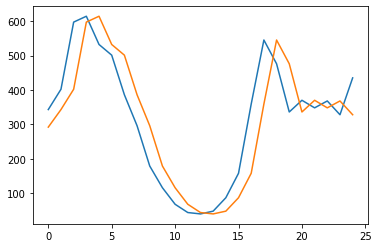

In [16]:
# walk-forward validation
predictions = list()
for x in x_test:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(y_test, predictions)
rmse_error = np.sqrt(test_score)

print('Test MSE: %.3f' % test_score)
print("Test RMSE: ", rmse_error)

plt.plot(y_test[500:525])
plt.plot(predictions[500:525])

In [17]:
def lstm_every_side(data):
    for column in df_sides:
        function1
        function2

# LSTM only past values as input

This section is broken down into three steps:

- Transform the time series into a supervised learning problem
- Transform the time series data so that it is stationary.
- Transform the observations to have a specific scale.

In [18]:
df_ohara = df_sides.iloc[:, 0]

In [19]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

diff_values = pd.DataFrame(difference(df_ohara, 1))
print(diff_values.shape)

(10223, 1)


In [20]:
# specify number of lag hours
n_hours = 1
n_features = 1
n_obs = n_hours * n_features

def ts_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

supervised = ts_supervised(diff_values, n_hours)

In [21]:
def split_data(data):
    # set fractions
    train_size = int(len(data) * 0.8)
    test_size = len(data) - train_size
    
    # split data into train and test sets
    train = data[0:train_size]
    test = data[train_size:]
    
    # split train and test further into x_train, y_train, x_test, y_test
    # when using multiple time steps
    x_train = train.iloc[:, :n_obs]
    x_test = test.iloc[:, :n_obs]
    
    # y_train = train.iloc[:, -n_features]
    # y_test = test.iloc[:, -n_features]
    
    y_train = train.iloc[:, -1]
    y_test = test.iloc[:, -1]
    
    # when using 1 time step
    # x_train = train.iloc[:, 0:4] # input for training set
    # x_test = test.iloc[:, 0:4] # input for test set

    # y_train = train.iloc[:, 4] # output for training set
    # y_test = test.iloc[:, 4] # output for test set
    
    # convert into numpy arrays
    x_train = x_train.to_numpy()
    x_test = x_test.to_numpy()
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
    
    # reshape to make numpy arrays into 2D
    x_train = x_train.reshape(-1,1)
    x_test = x_test.reshape(-1,1)
    y_train = y_train.reshape(-1,1)
    y_test = y_test.reshape(-1,1)
    
    return train, test, x_train, x_test, y_train, y_test

train, test, x_train, x_test, y_train, y_test = split_data(supervised)
print(train.shape, test.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(8177, 2) (2045, 2) (8177, 1) (2045, 1) (8177, 1) (2045, 1)


In [22]:
def scale(x_train, x_test, y_train, y_test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1,1))
    scaler = scaler.fit(x_train)
    
    x_train_scaled = scaler.transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    y_train_scaled = scaler.transform(y_train)
    y_test_scaled = scaler.transform(y_test)
    
    x_train_scaled = np.reshape(x_train_scaled, (x_train_scaled.shape[0], n_hours, n_features))
    x_test_scaled = np.reshape(x_test_scaled, (x_test_scaled.shape[0], n_hours, n_features))
    
    return scaler, x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled

scaler, x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = scale(x_train, x_test, y_train, y_test)
print(x_train_scaled.shape, x_test_scaled.shape, y_train_scaled.shape, y_test_scaled.shape)

(8177, 1, 1) (2045, 1, 1) (8177, 1) (2045, 1)


In [23]:
def fit_lstm(x_train_scaled, y_train_scaled, batch, ep, neurons_lstm, neuron_dense):
    model = Sequential()
    model.add(LSTM(units=neurons_lstm, input_shape=(x_train_scaled.shape[1], x_train_scaled.shape[2])))
    model.add(Dropout(rate=0.2))
    model.add(Dense(units=neuron_dense))
    model.compile(loss="mean_squared_error", 
                  optimizer="adam",
                 )
    
    history = model.fit(x_train_scaled, 
                        y_train_scaled, 
                        epochs=ep, 
                        batch_size=batch, 
                        validation_split=0.1, 
                        verbose=0, 
                        shuffle=False)
    return model, history

In [24]:
model, history = fit_lstm(x_train_scaled, 
                          y_train_scaled, 
                          batch=100, ep=50, 
                          neurons_lstm=5, 
                          neuron_dense=1)

In [25]:
history.history.keys()

dict_keys(['val_loss', 'loss'])

Text(0, 0.5, 'Loss')

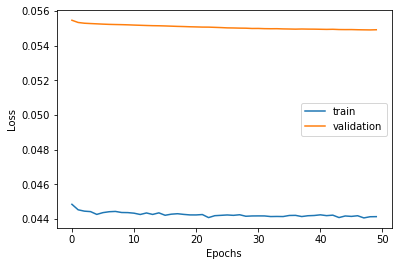

In [26]:
#Evaluate Network
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [27]:
def predictions_lstm(x_test_scaled, y_test):
    # get predictions
    test_pred = model.predict(x_test_scaled)
    
    # reverse transform predictions
    test_pred_inv = scaler.inverse_transform(test_pred)
    
    # reverse differencing predictions
    inverted_pred = list()
    for i in range(len(test_pred_inv)):
        value = inverse_difference(df_ohara, test_pred_inv[i], len(test_pred_inv)-i)
        inverted_pred.append(value)
    inverted_pred = pd.DataFrame(inverted_pred)
    
    # reverse differencing y_test
    inverted_ytest = list()
    for i in range(len(y_test)):
        value = inverse_difference(df_ohara, y_test[i], len(y_test)+1-i)
        inverted_ytest.append(value)
    inverted_ytest = pd.DataFrame(inverted_ytest)
    
    # create single dataframe with predictions (1) and expected values (2)
    predictions = np.concatenate((inverted_pred, inverted_ytest), axis=1)
    predictions = pd.DataFrame(predictions)
    
    return test_pred, test_pred_inv, predictions



In [28]:
test_pred, test_pred_inv, predictions = predictions_lstm(x_test_scaled, y_test)

print(test_pred.shape, test_pred_inv.shape, predictions.shape)

(2045, 1) (2045, 1) (2045, 2)


In [29]:
def evaluate_lstm(predictions, start_val, end_val):
    # print RMSE
    rmse = np.sqrt(mean_squared_error(predictions[0], predictions[1]))
    mse_error = rmse**2
    mean_value = predictions.iloc[:,1].mean()
    print("Pred MSE:", mse_error)
    print('Pred RMSE: %.3f' % rmse)
    print("Test mean value:", mean_value)
    
    
    # print min max values of predictions and actual values.
    print("Min. value pred:", predictions[0].min())
    print("Max. value pred:", predictions[0].max())

    print("Min. value test:", predictions[1].min())
    print("Max. value test:", predictions[1].max())
    
    # plot predictions vs actual values
    plt.plot(predictions.iloc[start_val:end_val, 0])
    plt.plot(predictions.iloc[start_val:end_val, 1])
    
    return rmse

Pred MSE: 10.70053681564376
Pred RMSE: 3.271
Test mean value: 100.10268948655256
Min. value pred: 4.0103607177734375
Max. value pred: 308.2343444824219
Min. value test: 9.0
Max. value test: 306.0


3.2711675003955025

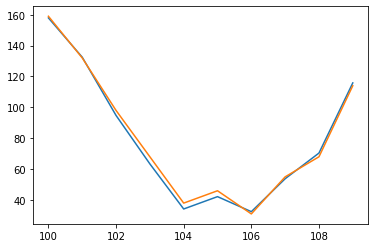

In [30]:
evaluate_lstm(predictions, start_val=100, end_val=110)

# LSTM Multivariate demand prediction with weather data

We should add the weather data to the dataset. In other words, we are making a multivariate time series.

In [31]:
# Import hourly weather data

weather = pd.read_csv("Chicago Ohare hourly weather relevant data.csv")
weather["Date"] = pd.to_datetime(weather["Date"])
weather.drop("WeatherType", axis=1, inplace=True)
weather["Temperature"] = weather["Temperature"].astype("float32")
weather.set_index("Date", inplace=True)

In [32]:
weather.head()

,Precipitation,WindSpeed,Temperature
Date,,,
2018-11-01 00:00:00,0.0,9.66,9.0
2018-11-01 01:00:00,0.0,9.66,9.0
2018-11-01 02:00:00,0.0,9.66,9.0
2018-11-01 03:00:00,0.0,12.88,9.0
2018-11-01 04:00:00,0.0,16.10,9.0


In [33]:
df_ohara = pd.DataFrame(df_sides[["NS", "is_holiday", "is_weekend", "season"]])
df_ohara.head()

,NS,is_holiday,is_weekend,season
StartTime,,,,
2018-11-01 00:00:00,174,0,0,2
2018-11-01 01:00:00,200,0,0,2
2018-11-01 02:00:00,122,0,0,2
2018-11-01 03:00:00,73,0,0,2
2018-11-01 04:00:00,50,0,0,2


In [34]:
df_lstm = df_ohara.merge(weather, how="left", left_index=True, right_index=True)
df_lstm.astype("float32")
df_lstm.head()

,NS,is_holiday,is_weekend,season,Precipitation,WindSpeed,Temperature
StartTime,,,,,,,
2018-11-01 00:00:00,174,0,0,2,0.0,9.66,9.0
2018-11-01 01:00:00,200,0,0,2,0.0,9.66,9.0
2018-11-01 02:00:00,122,0,0,2,0.0,9.66,9.0
2018-11-01 03:00:00,73,0,0,2,0.0,12.88,9.0
2018-11-01 04:00:00,50,0,0,2,0.0,16.10,9.0


In [35]:
df_weather = df_lstm.iloc[:,0]

In [36]:
df_lstm.iloc[:, [0,4,5,6]]

,NS,Precipitation,WindSpeed,Temperature
StartTime,,,,
2018-11-01 00:00:00,174,0.0,9.66,9.0
2018-11-01 01:00:00,200,0.0,9.66,9.0
2018-11-01 02:00:00,122,0.0,9.66,9.0
2018-11-01 03:00:00,73,0.0,12.88,9.0
2018-11-01 04:00:00,50,0.0,16.10,9.0
...,...,...,...,...
2019-12-31 19:00:00,600,0.0,24.15,-2.0
2019-12-31 20:00:00,695,0.0,24.15,-2.0
2019-12-31 21:00:00,610,0.0,17.71,-3.0


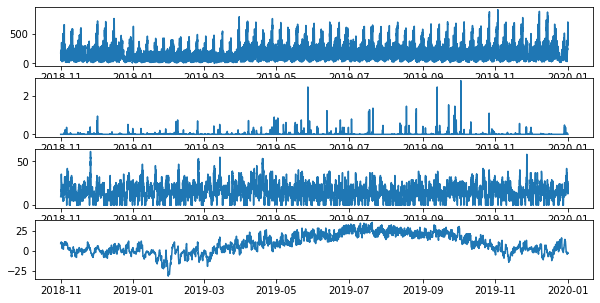

In [37]:
# plot hourly pickups with weather data.
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10,5))
ax[0].plot(df_lstm["NS"])
ax[1].plot(df_lstm["Precipitation"])
ax[2].plot(df_lstm["WindSpeed"])
ax[3].plot(df_lstm["Temperature"])

# LSTM data preperation

Frame dataset as supervised learning problem and MinMaxScale the data

Try to predict ride hailing demand at hour (t) based on demand and weather data in period (t-1). Later try to predict based on past 24 hours (t-1 - t-24)

In [38]:
df_lstm

,NS,is_holiday,is_weekend,season,Precipitation,WindSpeed,Temperature
StartTime,,,,,,,
2018-11-01 00:00:00,174,0,0,2,0.0,9.66,9.0
2018-11-01 01:00:00,200,0,0,2,0.0,9.66,9.0
2018-11-01 02:00:00,122,0,0,2,0.0,9.66,9.0
2018-11-01 03:00:00,73,0,0,2,0.0,12.88,9.0
2018-11-01 04:00:00,50,0,0,2,0.0,16.10,9.0
...,...,...,...,...,...,...,...
2019-12-31 19:00:00,600,1,0,3,0.0,24.15,-2.0
2019-12-31 20:00:00,695,1,0,3,0.0,24.15,-2.0
2019-12-31 21:00:00,610,1,0,3,0.0,17.71,-3.0


In [39]:
# specify number of lag hours
n_hours = 1
n_features = 4
n_obs = n_hours * n_features

# diff1 = df_lstm.iloc[:, [0,4,5,6]].diff(n_hours)
diff1 = df_lstm.iloc[:, [0]].diff(n_hours)
diff1 = diff1.iloc[n_hours:, :]
diff1.shape

(10223, 1)

In [40]:
diff_dic = {}

for count, item in enumerate(df_lstm[["NS", "Temperature"]]):
    diff = difference(df_lstm[:][item], 1)
    diff_dic[item] = diff

diff_df = pd.DataFrame(diff_dic)



In [41]:
diff1.head(2)

,NS
StartTime,
2018-11-01 01:00:00,26.0
2018-11-01 02:00:00,-78.0


In [42]:
diff_df.head(2)

,NS,Temperature
0,26,0.0
1,-78,0.0


In [43]:
def ts_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# supervised = ts_supervised(diff1, n_hours)
# # supervised = supervised.iloc[:, :-n_features+1]
# supervised = df_lstm.iloc[:, [1,2,3,4,5,6]].merge(supervised, how="right", left_index=True, right_index=True) 
# supervised.shape

In [45]:
# making time series supervised
supervised_dic = {}

for col in diff_df:
    supervised = ts_supervised(diff_df[[col]], 1)
    supervised_dic[col] = supervised

In [93]:
# merge supervised time series with weather data and holidays
supervised_remerged_dic = {}

for key in supervised_dic:
    supervised_remerged = pd.concat([df_lstm.iloc[2:, 1:].set_index(supervised_dic[key].index), supervised_dic[key]], axis=1)
    supervised_remerged_dic[key] = supervised_remerged
    

In [95]:
df_lstm.head(2)

,NS,is_holiday,is_weekend,season,Precipitation,WindSpeed,Temperature
StartTime,,,,,,,
2018-11-01 00:00:00,174,0,0,2,0.0,9.66,9.0
2018-11-01 01:00:00,200,0,0,2,0.0,9.66,9.0


In [94]:
print(supervised_remerged_dic["NS"].shape)
supervised_remerged_dic["NS"]

(10222, 8)


,is_holiday,is_weekend,season,Precipitation,WindSpeed,Temperature,var1(t-1),var1(t)
1,0,0,2,0.0,9.66,9.0,26.0,-78
2,0,0,2,0.0,12.88,9.0,-78.0,-49
3,0,0,2,0.0,16.10,9.0,-49.0,-23
4,0,0,2,0.0,14.49,10.0,-23.0,30
5,0,0,2,0.0,16.10,10.0,30.0,61
...,...,...,...,...,...,...,...,...
10218,1,0,3,0.0,24.15,-2.0,-33.0,204
10219,1,0,3,0.0,24.15,-2.0,204.0,95
10220,1,0,3,0.0,17.71,-3.0,95.0,-85
10221,1,0,3,0.0,12.88,-3.0,-85.0,-110


In [ ]:
n_feat = (len(supervised.columns)-1)

def split_data(data):
    # set fractions
    train_size = int(len(data) * 0.8)
    test_size = len(data) - train_size
    
    # split data into train and test sets
    train = data[0:train_size]
    test = data[train_size:]
    
    # split train and test further into x_train, y_train, x_test, y_test
    # when using multiple time steps
    x_train = train.iloc[:, :n_feat]
    x_test = test.iloc[:, :n_feat]
    
    # y_train = train.iloc[:, -n_features]
    # y_test = test.iloc[:, -n_features]
    
    y_train = train.iloc[:, -1]
    y_test = test.iloc[:, -1]
    
    # when using 1 time step
    # x_train = train.iloc[:, 0:4] # input for training set
    # x_test = test.iloc[:, 0:4] # input for test set

    # y_train = train.iloc[:, 4] # output for training set
    # y_test = test.iloc[:, 4] # output for test set
    
    # convert into numpy arrays
    x_train = x_train.to_numpy()
    x_test = x_test.to_numpy()
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
    
    # reshape to make numpy arrays into 2D
    # x_train = x_train.reshape(-1,1)
    # x_test = x_test.reshape(-1,1)
    y_train = y_train.reshape(-1,1)
    y_test = y_test.reshape(-1,1)
    
    return train, test, x_train, x_test, y_train, y_test

train, test, x_train, x_test, y_train, y_test = split_data(supervised)
print(train.shape, test.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape)


In [ ]:
n_feat

In [ ]:
def scale(x_train, x_test, y_train, y_test):
    # fit scaler
    x_scaler = MinMaxScaler(feature_range=(-1,1))
    x_scaler = x_scaler.fit(x_train)
    y_scaler = MinMaxScaler(feature_range=(-1,1))
    y_scaler = y_scaler.fit(y_train)
    
    x_train_scaled = x_scaler.transform(x_train)
    x_test_scaled = x_scaler.transform(x_test)
    y_train_scaled = y_scaler.transform(y_train)
    y_test_scaled = y_scaler.transform(y_test)
    
    x_train_scaled = np.reshape(x_train_scaled, (x_train_scaled.shape[0], n_hours, n_feat))
    x_test_scaled = np.reshape(x_test_scaled, (x_test_scaled.shape[0], n_hours, n_feat))
    
    return x_scaler, y_scaler, x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled

x_scaler, y_scaler, x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = scale(x_train, x_test, y_train, y_test)
print(x_train_scaled.shape, x_test_scaled.shape, y_train_scaled.shape, y_test_scaled.shape)

In [ ]:
def fit_lstm(x_train_scaled, y_train_scaled, batch, ep, neurons_lstm, neuron_dense):
    model = Sequential()
    model.add(LSTM(units=neurons_lstm, input_shape=(x_train_scaled.shape[1], x_train_scaled.shape[2])))
    model.add(Dropout(rate=0.2))
    model.add(Dense(units=neuron_dense))
    model.compile(loss="mean_squared_error", 
                  optimizer="adam",
                 )
    
    history = model.fit(x_train_scaled, 
                        y_train_scaled, 
                        epochs=ep, 
                        batch_size=batch, 
                        validation_split=0.1, 
                        verbose=2, 
                        shuffle=False)
    return model, history

In [ ]:
model, history = fit_lstm(x_train_scaled, 
                          y_train_scaled, 
                          batch=100, ep=50, 
                          neurons_lstm=5, 
                          neuron_dense=1)

In [ ]:
#Evaluate Network
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [ ]:
def predictions_lstm(x_test_scaled, y_test):
    # get predictions
    test_pred = model.predict(x_test_scaled)
    
    # reverse transform predictions
    test_pred_inv = y_scaler.inverse_transform(test_pred)
    
    # reverse differencing predictions
    inverted_pred = list()
    for i in range(len(test_pred_inv)):
        value = inverse_difference(df_lstm.iloc[:,0], test_pred_inv[i], len(test_pred_inv)-i)
        inverted_pred.append(value)
    inverted_pred = pd.DataFrame(inverted_pred)
    
    # reverse differencing y_test
    inverted_ytest = list()
    for i in range(len(y_test)):
        value = inverse_difference(df_lstm.iloc[:,0], y_test[i], len(y_test)+1-i)
        inverted_ytest.append(value)
    inverted_ytest = pd.DataFrame(inverted_ytest)
    
    # create single dataframe with predictions (1) and expected values (2)
    predictions = np.concatenate((inverted_pred, inverted_ytest), axis=1)
    predictions = pd.DataFrame(predictions)
    
    return test_pred, test_pred_inv, predictions

test_pred, test_pred_inv, predictions = predictions_lstm(x_test_scaled, y_test)

print(test_pred.shape, test_pred_inv.shape, predictions.shape)



In [ ]:
evaluate_lstm(predictions, start_val=1000, end_val=1100)

# Buidling robust results

Here, I repeat the predictions multiple and average RMSE.

In [ ]:
repeats = 3
error_scores = list()

for i in range(repeats):
    # fit the model
    model, history = fit_lstm(x_train_scaled, 
                              y_train_scaled, 
                              batch=100, ep=10, 
                              neurons_lstm=5, 
                              neuron_dense=1)
    # make predictions
    predictions = predictions_lstm(x_test_scaled, y_test)
    # report performance
    rmse = np.sqrt(mean_squared_error(predictions[0], predictions[1]))
    print('%d) Test RMSE: %.3f' % (i+1, rmse))
    error_scores.append(rmse)

    # summarize the results
    results = pd.DataFrame()
    results["rmse"] = error_scores
    print(results.head())
    print(results.describe())
    results.boxplot()